# 1) Problem Statement

<font size=4 color="blue"><center><b> Build a linear regression model to predict the average happiness scores of different countries based on the data collected from World Happiness Record (WHR). </b></center></font>


# 2) Data Collection

The data is downloaded from the World Happiness Record.

Source:<a href='https://worldhappiness.report/data/'> World Happiness Record </a>

In [1]:
# For Data Manipulation
import numpy as np
import pandas as pd
import scipy.stats as st

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

sns.set_theme(style='whitegrid',palette='hls')

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For Model Training
from category_encoders import BaseNEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
happiness_df = pd.read_excel(r'happiness_dataset.xls',sheet_name=0)
pd.concat([happiness_df.head(),happiness_df.tail()])

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008     3.723590            7.350416        0.450662   
1     Afghanistan  2009     4.401778            7.508646        0.552308   
2     Afghanistan  2010     4.758381            7.613900        0.539075   
3     Afghanistan  2011     3.831719            7.581259        0.521104   
4     Afghanistan  2012     3.782938            7.660506        0.520637   
2194     Zimbabwe  2018     3.616480            7.783066        0.775388   
2195     Zimbabwe  2019     2.693523            7.697755        0.759162   
2196     Zimbabwe  2020     3.159802            7.596050        0.717243   
2197     Zimbabwe  2021     3.154578            7.656878        0.685151   
2198     Zimbabwe  2022     3.296220            7.670123        0.666172   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                            50.500000                      0.718114   
1                            50.799999                      0.678896   
2                            51.099998                      0.600127   
3                            51.400002                      0.495901   
4                            51.700001                      0.530935   
2194                         52.625000                      0.762675   
2195                         53.099998                      0.631908   
2196                         53.575001                      0.643303   
2197                         54.049999                      0.667636   
2198                         54.525002                      0.651987   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
0       0.167652                   0.881686         0.414297         0.258195  
1       0.190809                   0.850035         0.481421         0.237092  
2       0.121316                   0.706766         0.516907         0.275324  
3       0.163571                   0.731109         0.479835         0.267175  
4       0.237588                   0.775620         0.613513         0.267919  
2194   -0.051219                   0.844209         0.657524         0.211726  
2195   -0.047464                   0.830652         0.658434         0.235354  
2196    0.006313                   0.788523         0.660658         0.345736  
2197   -0.075575                   0.756945         0.609917         0.241682  
2198   -0.069513                   0.752632         0.640609         0.191350

**Meta Deta:**

-> Country name: Contains name of the 165 five countries.

-> year: year column ranges from 2008 to 2022.

-> Life Ladder: Contains the happiness score on a scale of 0 to 10.

-> Log GDP per Capita: Contains the logged value of GDP per capita of countries.

->Social Support: National average of the questions "If you
were in trouble, do you have relatives or friends you can count on to help you
whenever you need them, or not?

-> Healthy Life Expectancy at birth: Number of years a person is expected to live at the time of birth.

-> Freedom to make life choicesNational a Average of the question “Are you satisfied or dissatisfied with your freedom to choose wh t
you do with your life?”
-> GenerosityNational e average of the question "Have you donated money to a charity in a past few months

-> Perception of Corruption: National average of the question “Is corruption widespread throughout 
the government or no?t

-> Positive affect: average of three positive affect measures in 
GWP: laugh, enjoyment and doing interesting thing.

-> Negatice affect:the average of three negative affect measures in 
GW:  worry, sadness and anger ”?"

# Data Exploration

In [3]:
happiness_df.shape

(2199, 11)

The dataset have 11 features and 2199 observations.

In [4]:
print('Column Names:',happiness_df.columns)

Column Names: Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')


In [5]:
# Renaming columns for ease of analysis
happiness_df.rename(columns={'Country name':'country','Life Ladder':'happiness_score','Log GDP per capita':'log_gdp_per_capita',
                            'Social support':'social_support','Healthy life expectancy at birth':'hle','Freedom to make life choices':'freedom',
                             'Generosity':'generosity','Perceptions of corruption':'corruption_perception','Positive affect':'positivity',
                            'Negative affect':'negativity'},inplace=True)

In [6]:
happiness_df.describe()

year  happiness_score  log_gdp_per_capita  social_support  \
count  2199.000000      2199.000000         2179.000000     2186.000000   
mean   2014.161437         5.479226            9.389766        0.810679   
std       4.718736         1.125529            1.153387        0.120952   
min    2005.000000         1.281271            5.526723        0.228217   
25%    2010.000000         4.646750            8.499764        0.746609   
50%    2014.000000         5.432437            9.498955        0.835535   
75%    2018.000000         6.309460           10.373216        0.904792   
max    2022.000000         8.018934           11.663788        0.987343   

               hle      freedom   generosity  corruption_perception  \
count  2145.000000  2166.000000  2126.000000            2083.000000   
mean     63.294583     0.747858     0.000096               0.745195   
std       6.901104     0.140150     0.161083               0.185837   
min       6.720000     0.257534    -0.337527               0.035198   
25%      59.119999     0.656528    -0.112116               0.688139   
50%      65.050003     0.769821    -0.022671               0.799654   
75%      68.500000     0.859382     0.092070               0.868827   
max      74.474998     0.985178     0.702708               0.983276   

        positivity   negativity  
count  2175.000000  2183.000000  
mean      0.652143     0.271501  
std       0.105922     0.086875  
min       0.178886     0.082737  
25%       0.571684     0.207660  
50%       0.663063     0.260671  
75%       0.737936     0.322894  
max       0.883586     0.704590

In [7]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                2199 non-null   object 
 1   year                   2199 non-null   int64  
 2   happiness_score        2199 non-null   float64
 3   log_gdp_per_capita     2179 non-null   float64
 4   social_support         2186 non-null   float64
 5   hle                    2145 non-null   float64
 6   freedom                2166 non-null   float64
 7   generosity             2126 non-null   float64
 8   corruption_perception  2083 non-null   float64
 9   positivity             2175 non-null   float64
 10  negativity             2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


## Handling Missing values

In [8]:
happiness_df.isnull().sum()

country                    0
year                       0
happiness_score            0
log_gdp_per_capita        20
social_support            13
hle                       54
freedom                   33
generosity                73
corruption_perception    116
positivity                24
negativity                16
dtype: int64

In [9]:
missing_df = happiness_df[happiness_df.isna().any(axis=1)]

I tried to find a valid dataset to use for filling missing GDP per capita values, but I couldn't find any. The only option left was to manually look for gdp per capita, take log value of it and then fill the missing value

In [10]:
gdp_from_google = np.array([25488.457,4336.87,31284,2213,29575,106,91,238,347,1245.15,
                            1071.78,1811.68,1600,3800000,34050000,33143,32756,3810,4053,6802.8])

log_gdp = np.log(gdp_from_google)
m = missing_df.log_gdp_per_capita.isna()
missing_df.loc[m,'log_gdp_per_capita'] = log_gdp
happiness_df = happiness_df.combine_first(missing_df)

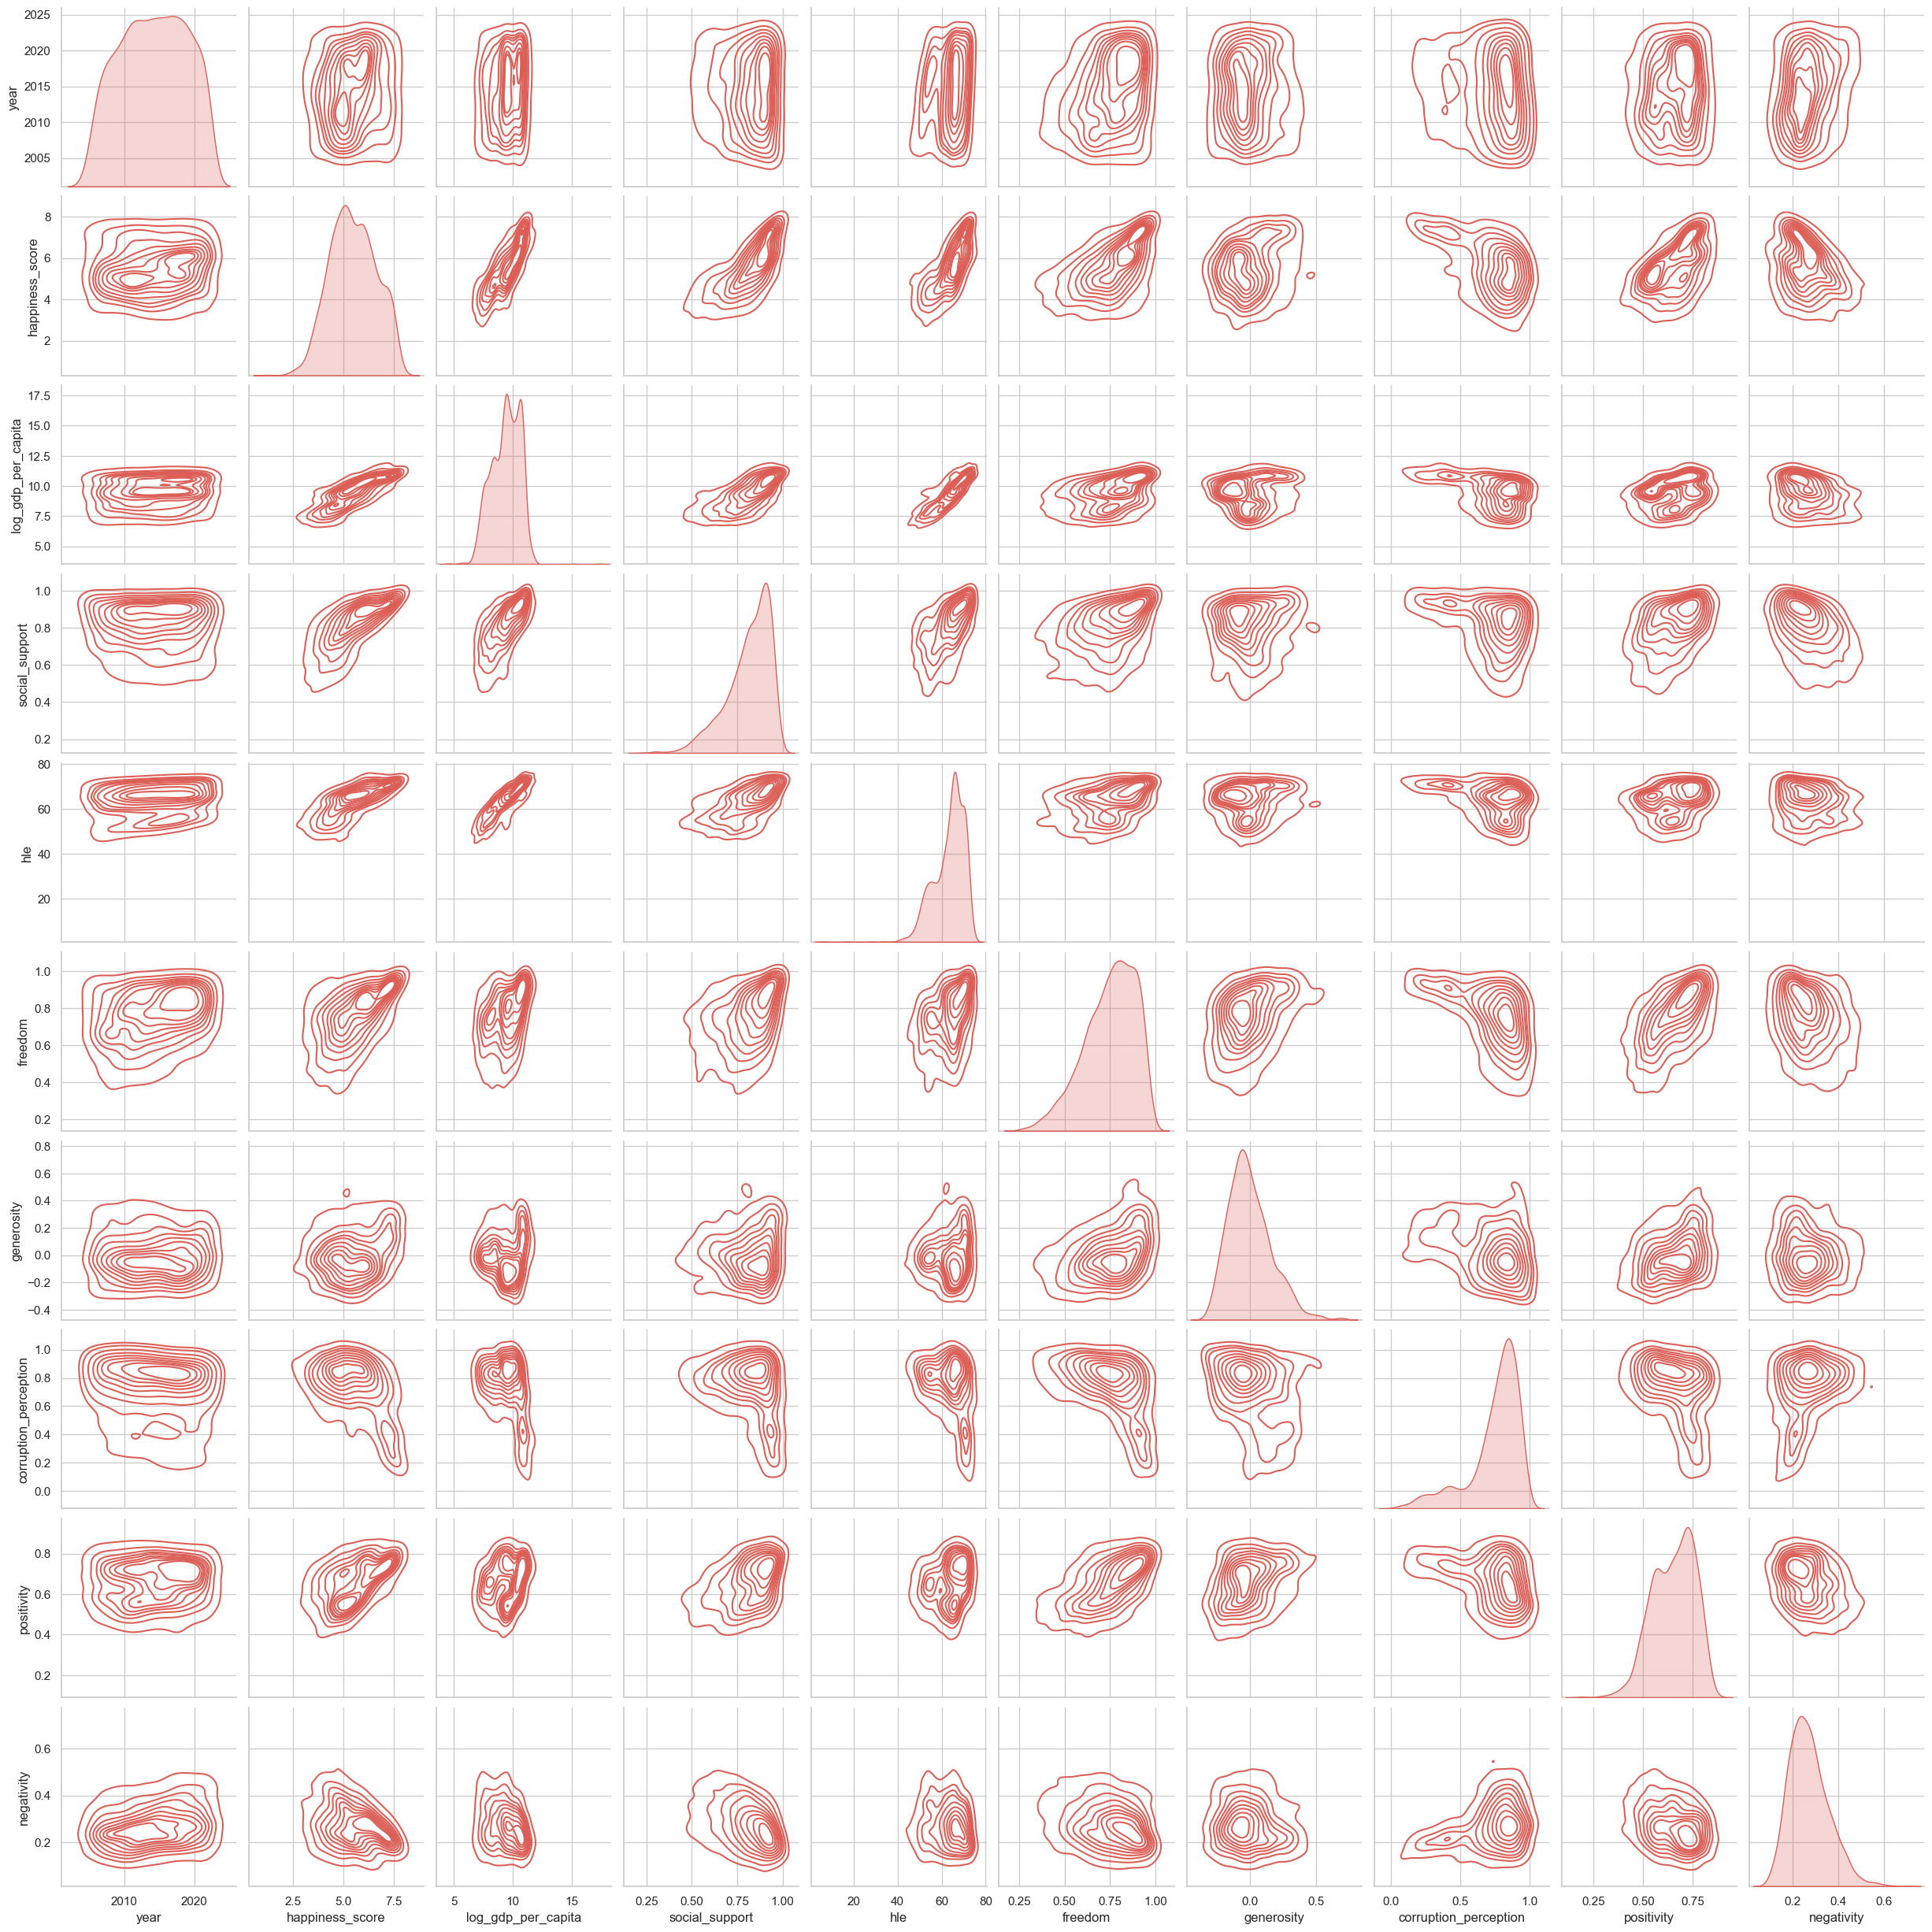

In [11]:
sns.pairplot(happiness_df,kind='kde',dropna=True)
plt.show()

Since all of the distributions are skewed, we are going to use median to fill null values.

In [12]:
missing_features = happiness_df.columns[4:]
for col in missing_features:
    happiness_df[col].fillna(value=happiness_df[col].median(),inplace=True)

In [13]:
happiness_df.isna().sum()

country                  0
year                     0
happiness_score          0
log_gdp_per_capita       0
social_support           0
hle                      0
freedom                  0
generosity               0
corruption_perception    0
positivity               0
negativity               0
dtype: int64

### Exploratory Data Analysis

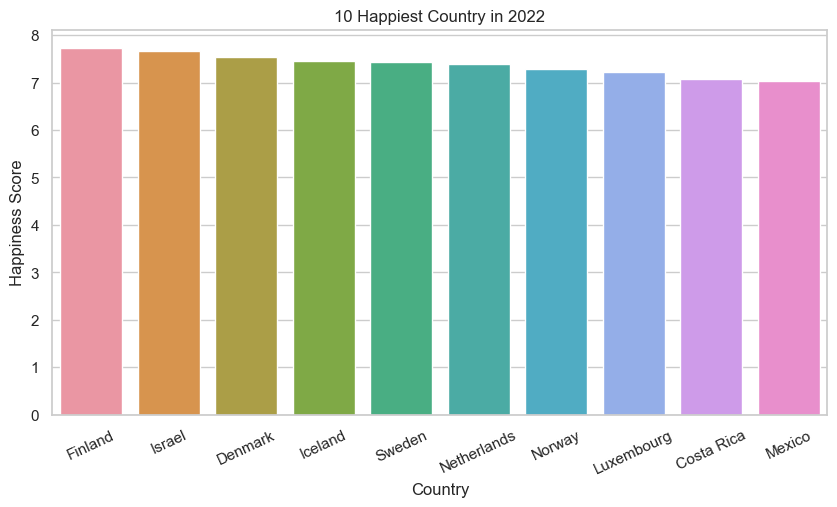

In [14]:
happiest_country = happiness_df[happiness_df['year']==2022].sort_values(by='happiness_score',ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x='country',y='happiness_score',data=happiest_country.head(10),errorbar=None)
plt.title('10 Happiest Country in 2022')
plt.xlabel('Country')
plt.xticks(rotation=25)
plt.ylabel('Happiness Score')
plt.show()

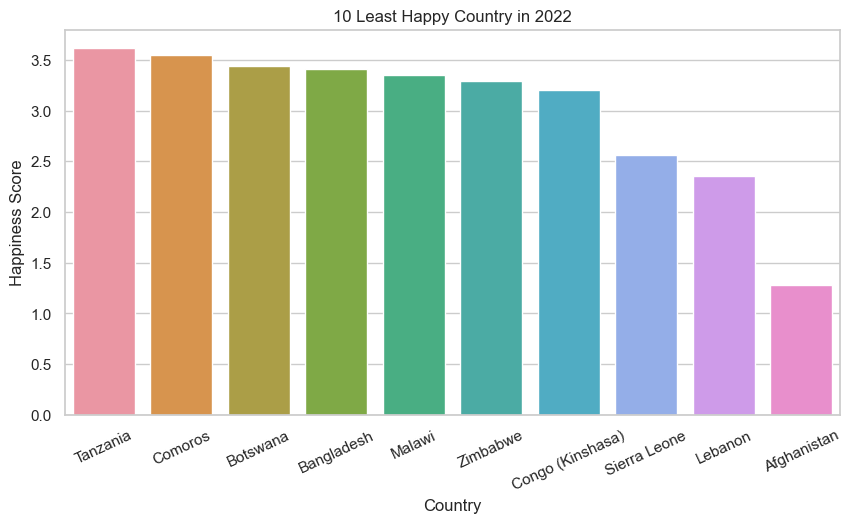

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x='country',y='happiness_score',data=happiest_country.tail(10),errorbar=None)
plt.title('10 Least Happy Country in 2022')
plt.xlabel('Country')
plt.xticks(rotation=25)
plt.ylabel('Happiness Score')
plt.show()

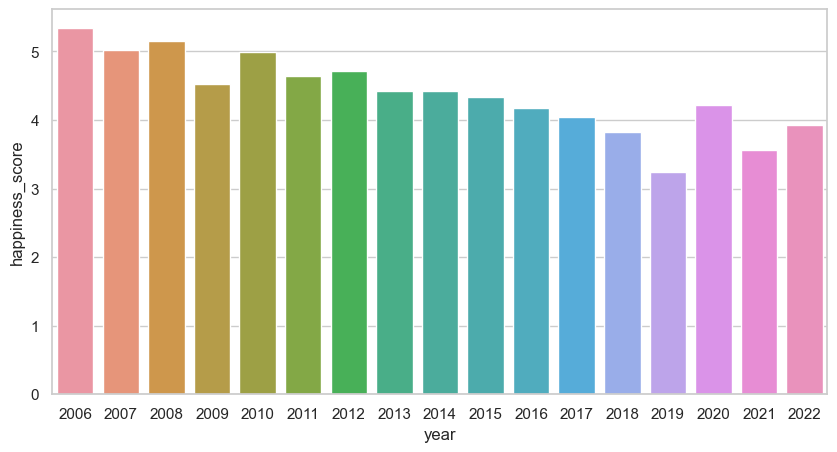

In [16]:
plt.figure(figsize=(10,5))
india_happiness = happiness_df[happiness_df['country'] == 'India']
sns.barplot(data=india_happiness, x='year',y='happiness_score')
plt.show()

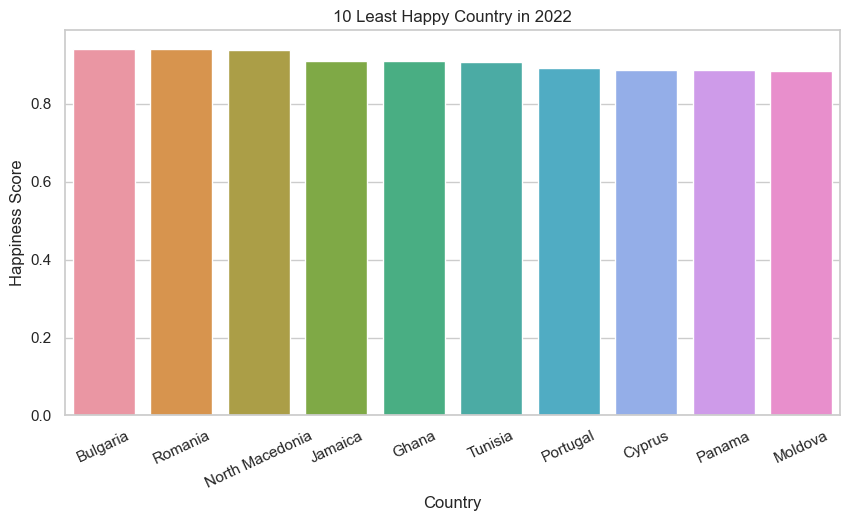

In [17]:
corrupt_country = happiness_df[happiness_df['year']==2022].sort_values(by='corruption_perception',ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x='country',y='corruption_perception',data=corrupt_country.head(10),errorbar=None)
plt.title('10 Least Happy Country in 2022')
plt.xlabel('Country')
plt.xticks(rotation=25)
plt.ylabel('Happiness Score')
plt.show()

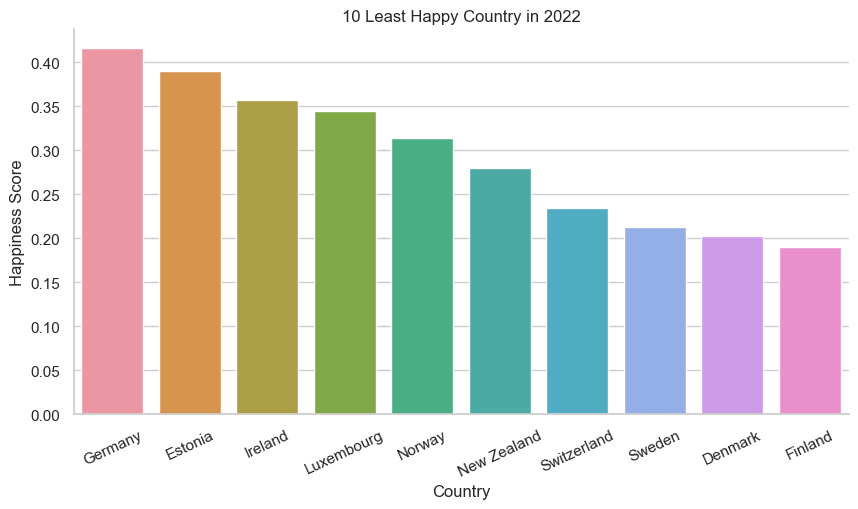

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x='country',y='corruption_perception',data=corrupt_country.tail(10),errorbar=None)
plt.title('10 Least Happy Country in 2022')
plt.xlabel('Country')
plt.xticks(rotation=25)
plt.ylabel('Happiness Score')
sns.despine()
plt.show()

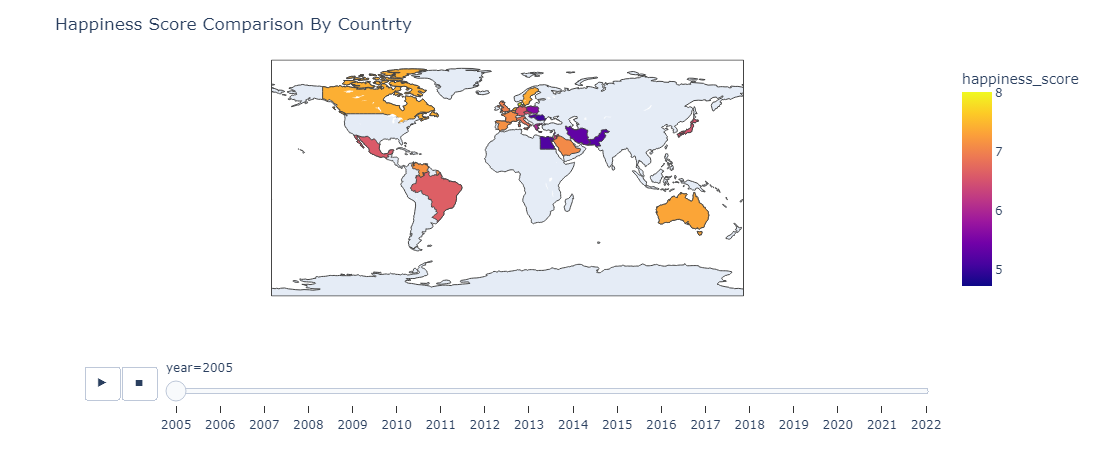

In [19]:
fig = px.choropleth(happiness_df.sort_values(by='year'),
                    locations = 'country',
                    color = 'happiness_score',
                    locationmode = 'country names',
                    animation_frame = 'year')
fig.update_layout(title='Happiness Score Comparison By Countrty',autosize=False)
fig.show()

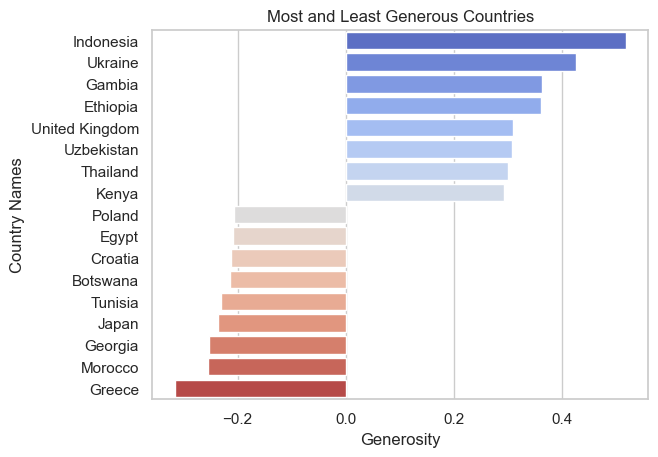

In [20]:
df_2021 = happiness_df[happiness_df['year']==2022]
generous_df_2021 = df_2021[(df_2021.loc[:,'generosity']>0.27) | (df_2021.loc[:,'generosity']<-0.2)].sort_values(by='generosity',ascending=False)
sns.barplot(data=generous_df_2021,x='generosity',y='country',palette='coolwarm')
plt.title('Most and Least Generous Countries')
plt.xlabel('Generosity')
plt.ylabel('Country Names')
plt.show()

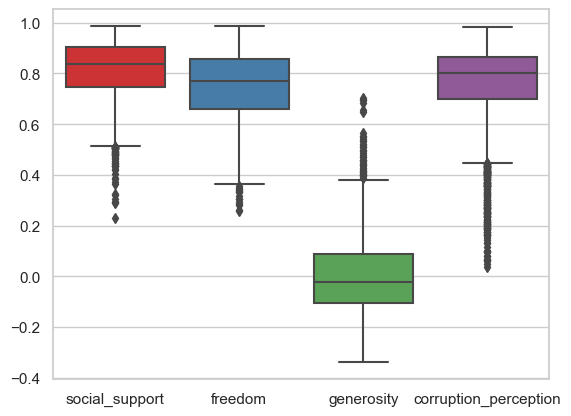

In [21]:
features=['social_support','freedom','generosity','corruption_perception']
sns.boxplot(happiness_df.loc[:,features],orient='v',palette='Set1')
plt.show()

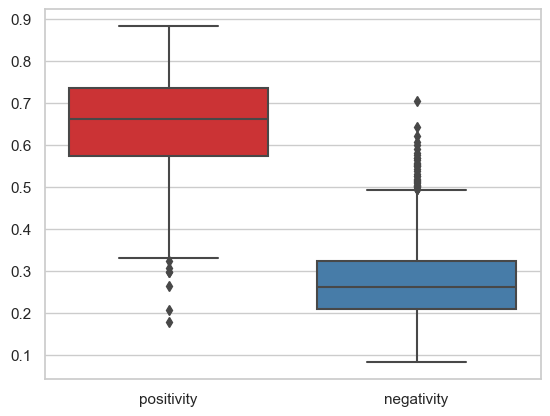

In [22]:
features = ['positivity','negativity']
sns.boxplot(happiness_df.loc[:,features],orient='v',palette='Set1')
plt.show()

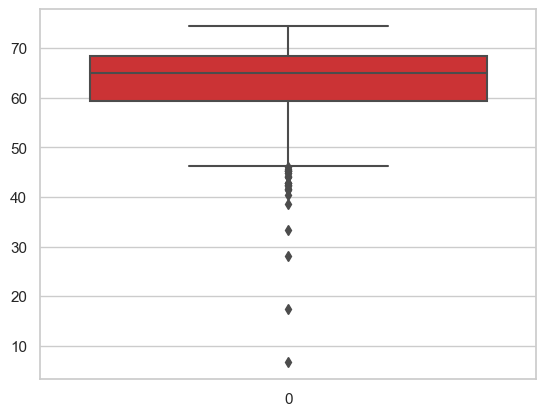

In [23]:
sns.boxplot(happiness_df.loc[:,'hle'],orient='v',palette='Set1')
plt.show()

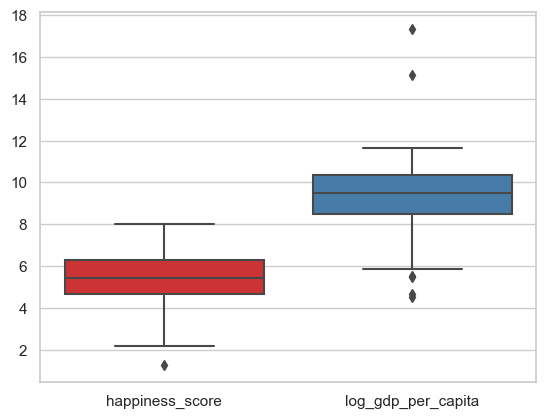

In [24]:
features = ['happiness_score','log_gdp_per_capita']
sns.boxplot(happiness_df.loc[:,features],orient='v',palette='Set1')
plt.show()

There's some outliers in almost all of the features. Now let's find the exact number of outliers

In [25]:
def outliers(data):
    Q1,Q3 = np.quantile(data,[0.25,0.75])
    IQR = Q3-Q1
    upper_limit = Q3 + 1.5*IQR
    lower_limit = Q1 - 1.5*IQR
    return data[(data>upper_limit) | (data<lower_limit)]

print('Number of Ouliers in each columns:')
columns = list(happiness_df.columns)[2:]
for col in columns:
    results = outliers(happiness_df[col].values)
    print(col,':',len(results))

Number of Ouliers in each columns:
happiness_score : 1
log_gdp_per_capita : 6
social_support : 53
hle : 26
freedom : 15
generosity : 40
corruption_perception : 214
positivity : 7
negativity : 34


# Linear Regression

### Preparing Data

In [26]:
# Base = 2 is used to BinaryEncoder
ce_BaseN10 = BaseNEncoder(cols=['country'],base=2)
df = ce_BaseN10.fit_transform(happiness_df)
df = df.drop(['year'],axis=1)

In [27]:
# Scaling data so that it mean=0 and variance=1
sc = StandardScaler()
scaled = sc.fit_transform(df.drop(['happiness_score'],axis=1))

col = list(df.columns)
col.remove('happiness_score')

df_scaled = pd.DataFrame(scaled,columns=col)
df_scaled['happiness_score'] = df['happiness_score']

In [28]:
#Splitting Data into train and test
x = df_scaled.drop(['happiness_score'],axis=1)
y = df_scaled['happiness_score']
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42,shuffle=True)

### 1) Assumption Of Linearity

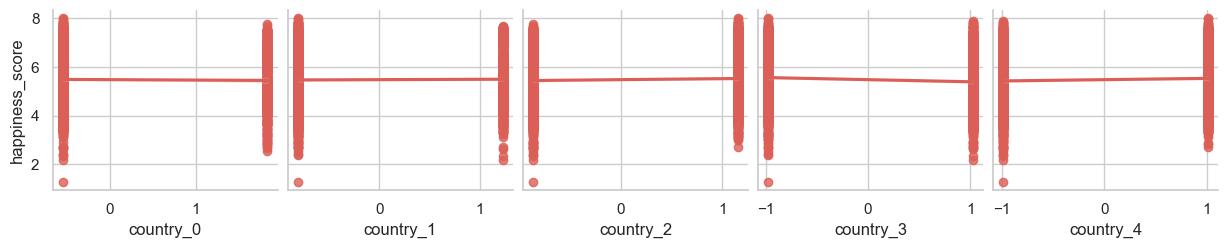

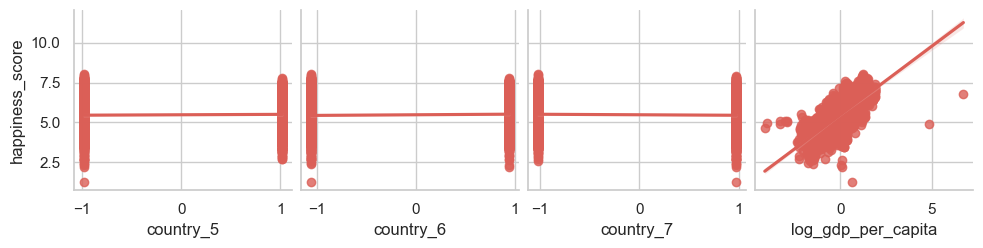

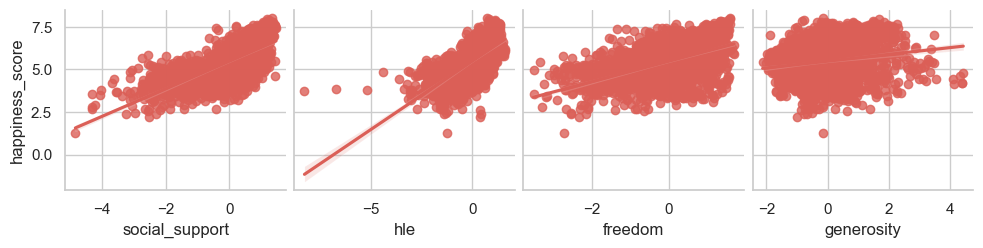

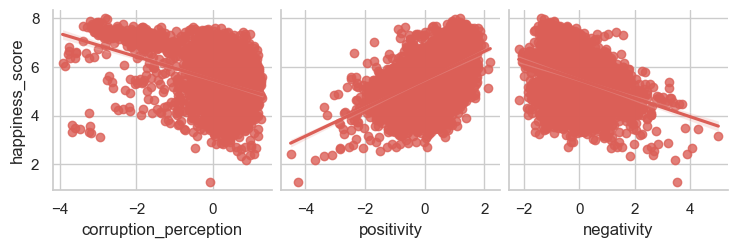

In [29]:
ind_vars = list(df_scaled.drop(['happiness_score'],axis=1).columns)
dep_vars = 'happiness_score'
sns.pairplot(data = df_scaled,y_vars=dep_vars,x_vars=ind_vars[0:5],kind='reg')
sns.pairplot(data = df_scaled,y_vars=dep_vars,x_vars=ind_vars[5:9],kind='reg')
sns.pairplot(data = df_scaled,y_vars=dep_vars,x_vars=ind_vars[9:13],kind='reg')
sns.pairplot(data = df_scaled,y_vars=dep_vars,x_vars=ind_vars[13:17],kind='reg')
plt.show()

Almost every features have a linear relationship with the dependent variable, except for the year, so we're not going to use 

### 2) Assumption of Mutlicollinearity

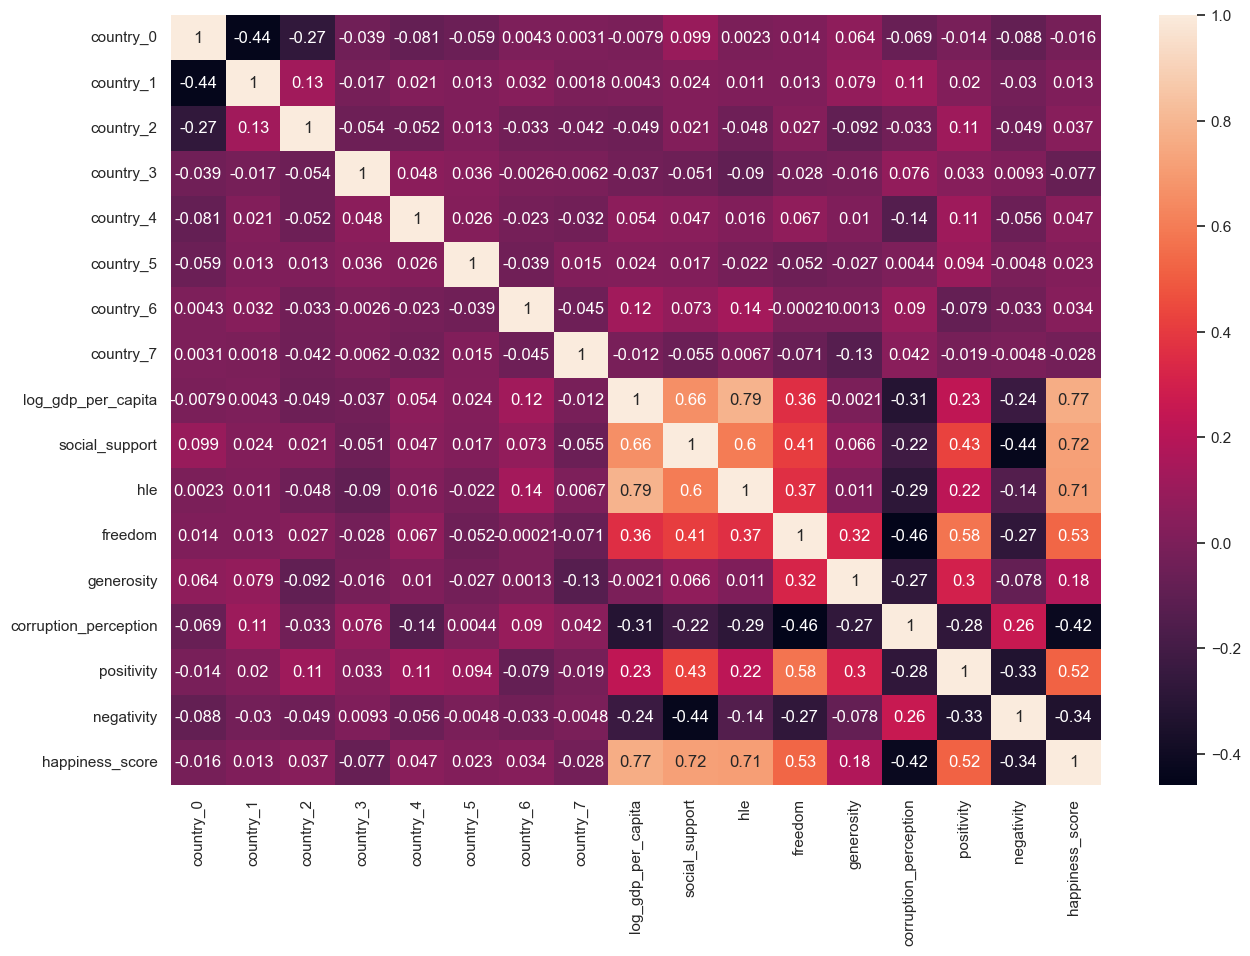

In [30]:
corr = df_scaled.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.show()

But this shows only bivariate relations and it is a little tough to interpret.

For better understanding, let us use VIF.

VIF = 1: No correlation

1 < VIF < 5: Low correlation

5 < VIF < 10: Moderate correlation

VIF > 10: High correlation

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

col = list(df.columns)
col.remove('happiness_score')
x_df = pd.DataFrame(x,columns=col)

vif = pd.DataFrame()
vif['features'] = x_df.columns
vif["VIF"] = [variance_inflation_factor(x_df.values, i) 
                          for i in range(len(x_df.columns))]
vif

features       VIF
0               country_0  1.413419
1               country_1  1.310228
2               country_2  1.154522
3               country_3  1.031766
4               country_4  1.054869
5               country_5  1.037391
6               country_6  1.063491
7               country_7  1.036807
8      log_gdp_per_capita  3.278407
9          social_support  2.549170
10                    hle  2.916181
11                freedom  1.948480
12             generosity  1.289221
13  corruption_perception  1.526112
14             positivity  1.859995
15             negativity  1.392444

Since the features have only moderate correlation, we can ignore it.

In [32]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
model.score(x_test,y_test)

0.7531080154556198

### 3) Assumption of Mean of Residuals

In [33]:
residuals = y_test - y_pred
residuals_mean = np.mean(residuals)
print(residuals_mean)

-0.023939308431426144


It is almost near to zero.

### 4) Assumption of Homoscedasticity

#### Scater Plot

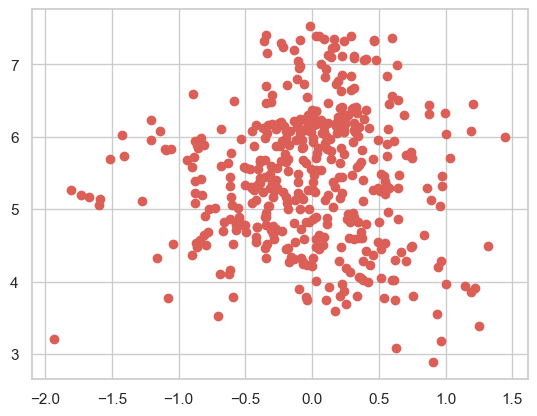

In [34]:
plt.scatter(residuals,y_pred)
plt.show()

#### Goldfeld-Quandt Test

In [35]:
from statsmodels.stats.diagnostic import het_goldfeldquandt, het_white

statistic,p_value,alternative=het_goldfeldquandt(residuals,x_test,drop=0.2,alternative='two-sided')
print('test statistic:',statistic)
print('P-value:',p_value)
print('Alternative Hypothesis:',alternative)

test statistic: 0.7552692692587663
P-value: 0.09595036173563083
Alternative Hypothesis: two-sided


**Luckily, data is homoscedastic in nature.**

### 5) Assumption of Normality of residuals

#### Normal Distribution plot

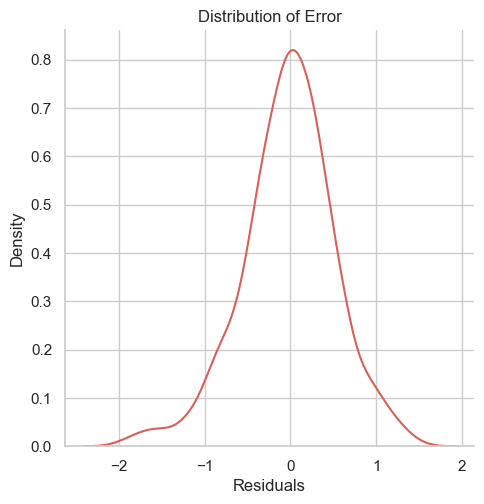

In [36]:
sns.displot(residuals,kind='kde')
plt.xlabel('Residuals')
plt.title('Distribution of Error')
plt.show()

It seems almost normal.

#### Q-Q Plot

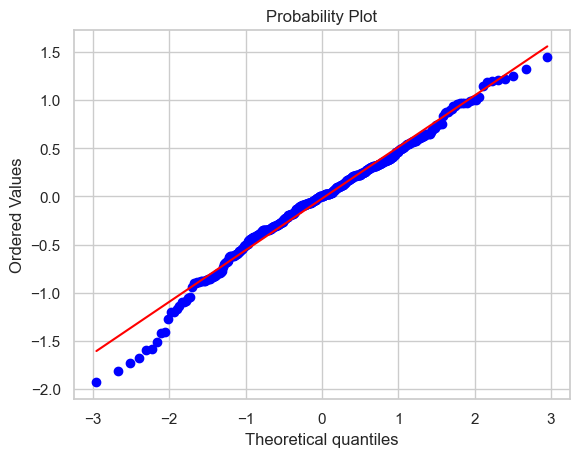

In [37]:
st.probplot(residuals,dist='norm',plot=plt)
plt.show()

Again, it seems almost normal.

Let's run some test for confirmation.

#### Tests for Nomality

In [38]:
print(st.shapiro(residuals))
print(st.kstest(residuals,cdf='norm'))

ShapiroResult(statistic=0.9846820831298828, pvalue=0.00013441237388178706)
KstestResult(statistic=0.18063438731905446, pvalue=4.926691377860921e-13)


After all, it is not a normal distribution

# Re-training model now

In [39]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [40]:
model.intercept_

5.484015694725878

In [41]:
model.coef_

array([-0.06194593, -0.03105374,  0.01807081, -0.04150462, -0.03707351,
       -0.01638727, -0.02339729, -0.00171393,  0.42856409,  0.25227682,
        0.20007841,  0.05579711,  0.055214  , -0.11244345,  0.25322569,
       -0.00457602])

# Checking Accuracy of the Model

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score

print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2-Score:",r2_score(y_test,y_pred))
print("Explained Variance:",explained_variance_score(y_test,y_pred))

MAE: 0.40652304487583624
MSE: 0.2884439571213487
RMSE: 0.5370697879431953
R2-Score: 0.7531080154556198
Explained Variance: 0.7535985490392008


-> Error of model is less which is a good thing.

-> The model makes prediction with 75.3% of accuracy.